In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('unall.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       14950 non-null  float64
 1   B       14950 non-null  float64
 2   C       14950 non-null  float64
 3   D       14950 non-null  float64
 4   E       14950 non-null  float64
 5   F       14950 non-null  float64
 6   G       14950 non-null  float64
 7   H       14950 non-null  float64
dtypes: float64(8)
memory usage: 934.5 KB


In [3]:
df.head()

,A,B,C,D,E,F,G,H
0,-9.160867,2.062130,4.837712,-4.346400,2.946743,0.603092,-8.299990,-8.165439
1,-0.231103,1.280835,-9.236738,-6.957041,3.804968,6.230847,-2.914726,8.033090
2,-9.048888,1.522202,5.120447,-4.911565,1.682313,0.114039,-8.477866,-7.879890
3,2.875032,-6.874256,1.354997,-2.420766,-7.512797,5.867499,8.617150,-4.975955
4,3.893718,-5.383670,1.013762,-3.266091,-5.721458,5.986232,9.082322,-4.018635


In [4]:
df.describe()

,A,B,C,D,E,F,G,H
count,14950.000000,14950.000000,14950.000000,14950.000000,14950.000000,14950.000000,14950.000000,14950.000000
mean,-1.185934,-0.896184,-1.264331,-4.677766,0.351573,4.246823,-1.191025,-1.576727
std,5.363437,3.810385,6.002542,1.640221,4.788649,2.878928,7.757159,6.776770
min,-10.537627,-8.837181,-11.946330,-9.052931,-8.691842,-2.389107,-11.802741,-9.844519
25%,-7.855753,-5.708744,-8.961021,-6.132064,-5.879588,0.802655,-8.547466,-6.819367
50%,0.330952,1.218370,1.069696,-4.516473,3.223332,5.605626,-3.853067,-5.360770
75%,3.965798,1.987569,4.122531,-3.330587,3.927089,6.484949,8.867105,7.412088
max,6.530497,4.706302,7.092492,-0.320651,6.043994,9.069891,11.706608,10.643789


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3)

In [7]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [8]:
kmeans.predict([[1,2,3,4,56,6,7,8]])

array([0])

In [9]:
kmeans.transform([[1,2,3,4,56,6,7,8]])

array([[55.86262515, 58.47491789, 64.83366692]])

In [10]:
kmeans.cluster_centers_

array([[ 0.33668422,  1.40613324, -9.44534503, -6.58114599,  3.70570442,
         6.69023167, -3.8540745 ,  7.88929041],
       [-8.31821248,  2.08027592,  4.5800723 , -4.48649629,  3.68890015,
         0.34085028, -9.02460214, -7.25444951],
       [ 4.43786571, -6.18676545,  1.07462692, -2.9622927 , -6.35467402,
         5.71389715,  9.32984445, -5.3703528 ]])

In [11]:
dftest = pd.read_csv('un_test.csv')

In [12]:
dftest.head()

,A,B,C,D,E,F,G,H
0,-8.394198,2.130580,4.550989,-3.985735,3.675691,0.037279,-9.610096,-5.409832
1,4.952155,-6.417093,1.529750,-3.416331,-7.892094,5.861197,10.167782,-5.014432
2,0.712611,2.526579,-8.992137,-6.231673,4.253149,7.303107,-4.525618,7.960269
3,-8.711706,2.744574,4.786655,-4.568053,2.750779,0.306981,-8.467796,-8.006584
4,3.182528,-5.604574,2.234331,-2.845613,-5.954910,4.068180,9.842163,-6.777029


In [13]:
def k_mean_distance(samp,cent):
        s = 0
        for i in range(len(samp)):
            s += ((samp[i]-cent[i])**2)
        return np.sqrt(s)

In [14]:
s = dftest.iloc[2,:].values
s

array([ 0.71261085,  2.5265786 , -8.99213715, -6.23167263,  4.25314857,
        7.3031071 , -4.52561755,  7.960269  ])

In [15]:
print(k_mean_distance(s,kmeans.cluster_centers_[0]))
print(k_mean_distance(s,kmeans.cluster_centers_[1]))
print(k_mean_distance(s,kmeans.cluster_centers_[2]))

1.6898423213866287
23.864730970399783
26.202275961416607


In [16]:
kmeans.predict(s.reshape(1,-1))

array([0])

In [17]:
###########################
# how to get those distances from sklean?

In [18]:
kmeans.transform(dftest)

array([[23.10081754,  2.02426777, 27.17586705],
       [26.67000096, 28.22616872,  1.98620423],
       [ 1.68984232, 23.86473097, 26.20227596],
       [24.61483625,  1.54997191, 26.54971601],
       [26.65536312, 25.74097472,  2.89529842],
       [24.86207543, 26.4603799 ,  1.27300541],
       [ 1.23572409, 24.40161108, 25.52364461],
       [23.96003722,  1.1207899 , 26.73157152],
       [24.44446576,  2.04779081, 25.59222985],
       [26.36951968, 27.44694124,  2.42548963],
       [26.2978049 , 27.35526634,  1.32178713],
       [24.11452697,  2.41854439, 26.0691422 ],
       [ 1.42053325, 24.75893817, 26.12425969],
       [23.63931705,  1.73516246, 26.57940052],
       [24.17825893,  2.01213888, 27.35784186],
       [24.73765746,  1.97154644, 28.00260911],
       [ 1.37535474, 23.90687491, 25.08366912],
       [25.62046267, 25.78544671,  2.27129784],
       [ 2.32736698, 24.65509987, 25.53551703],
       [25.01866635, 26.31849249,  1.33551553],
       [24.00556292,  1.7103808 , 27.482

In [19]:
kmeans.transform(dftest)[2]

array([ 1.68984232, 23.86473097, 26.20227596])

In [20]:
kmeans.predict(dftest.iloc[2,:].values.reshape(1,-1))

array([0])

In [21]:
#################################################

In [22]:
s = dftest.iloc[22,:].values
s

array([-6.60915229,  9.83777338,  0.93345454,  1.81839482,  3.79379379,
        0.93376324,  9.10384722,  4.96225064])

In [23]:
print(k_mean_distance(s,kmeans.cluster_centers_[0]))
print(k_mean_distance(s,kmeans.cluster_centers_[1]))
print(k_mean_distance(s,kmeans.cluster_centers_[2]))

22.52174399298306
24.380322267368268
25.186349514810328


In [24]:
kmeans.predict(s.reshape(1,-1))

array([0])

In [25]:
#############################################
# build basic anomaly detection mechanism, for marking around X% of the test set as suspected 
# lead - np.min, len(np.where...)    % =  (how many > distance)/len(test)

## 1. Calculating the distance of each record from the centroid

In [26]:
kmeans.transform(dftest)[:6]

array([[23.10081754,  2.02426777, 27.17586705],
       [26.67000096, 28.22616872,  1.98620423],
       [ 1.68984232, 23.86473097, 26.20227596],
       [24.61483625,  1.54997191, 26.54971601],
       [26.65536312, 25.74097472,  2.89529842],
       [24.86207543, 26.4603799 ,  1.27300541]])

## 2. Calculating the minimum distance of each record from the 3 centroids

In [27]:
aa = np.min(kmeans.transform(dftest)[:6], axis=1)
ab = aa.reshape(-1,1)
ab

array([[2.02426777],
       [1.98620423],
       [1.68984232],
       [1.54997191],
       [2.89529842],
       [1.27300541]])

## 3. Checking which records meet the condition

In [28]:
np.where(aa > 1.7)

(array([0, 1, 4], dtype=int64),)

## 4. What is the percentage of anomalies? (the number of records which meet the condition out of the total records)

In [29]:
len(aa)

6

In [30]:
len(np.where(aa > 1.7))

1

In [31]:
len(np.where(aa > 1.7)[0])

3

In [32]:
b = len(np.where(aa > 1.7)[0])/len(aa)
print("{:.2%}".format(b))

50.00%


## Building a Loop

In [33]:
p = []
max_d = np.linspace(0, 40, 300)
res = kmeans.transform(dftest)
mins = np.min(res, axis=1)
for d in max_d:
    n_sus = len(np.where(mins > d)[0])
    p.append(n_sus/len(res))

In [34]:
p[:16]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9,
 0.85,
 0.7666666666666667,
 0.6833333333333333,
 0.6166666666666667,
 0.5333333333333333]

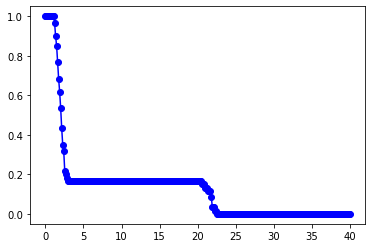

In [35]:
plt.plot(max_d, p, 'b-o')

In [36]:
df2 = pd.DataFrame()
df2['Distance'] = max_d
df2['Probability'] = p
df2.head()

,Distance,Probability
0,0.000000,1.0
1,0.133779,1.0
2,0.267559,1.0
3,0.401338,1.0
4,0.535117,1.0


In [37]:
df2[df2.Probability < 0.25].head()

,Distance,Probability
19,2.541806,0.216667
20,2.675585,0.200000
21,2.809365,0.183333
22,2.943144,0.166667
23,3.076923,0.166667


In [38]:
df2[df2.Probability == 0.20]

,Distance,Probability
20,2.675585,0.2
